# Classification Task

## Installation and Setup
For installation and setting up the repo, please refer to the [Installation Notebook](000_install.ipynb). 

In [1]:
import os
from utils.io import setup_repo

# Setup repo and checkout to the branch with the tutorials
setup_repo(
    git_url="https://github.com/openvinotoolkit/training_extensions.git",
    branch='tutorials/cvpr24',
)
os.getcwd()

'/home/sakcay/projects/training_extensions'

The above code will setup the repo, change the directory to the root directory of the repo, so we have access to all the files and folders in the repo.

## Prepare the Data

The first step is to prepare the dataset. If you haven't downloaded the dataset yet, you could download it via the following:

In [8]:
from notebooks.utils.download import download_dataset

download_dataset(
    url=(
        "https://github.com/openvinotoolkit/training_extensions/releases/download"
        "/fruits_and_vegetables_dataset/fruits_and_vegetables.zip"
    ),
    extract_to="data/fruits_and_vegetables",
)

The dataset is already available in data/fruits_and_vegetables


In [9]:
data_root = "./data/fruits_and_vegetables"
work_dir = "./otx-workspace-cls"

## Training with OTX Recipes
The first step in this task is to train a model using OTX recipes, which are available in the `recipes` folder. The recipes are in the form of `.yaml` files, which can be used to train a model using the `otx` library.

These recipes are pre-defined by the OTX, which are validated and tested to work with many different use-cases.

Let's see the available recipes for `MULTI_LABEL_CLS` task.

In [4]:
from otx.engine.utils.api import list_models

available_models = list_models(task="MULTI_LABEL_CLS", print_table=True)

/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                            OTX Recipes                                                     
       ┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓        
       ┃ Task            ┃ Model Name         ┃ Recipe Path                                               ┃        
       ┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩        
       │ MULTI_LABEL_CLS │ openvino_model     │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │        
       │                 │                    │ classification/multi_label_cls/openvino_model.yaml        │        
       │ MULTI_LABEL_CLS │ efficientnet_v2    │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │        
       │                 │                    │ classification/multi_label_cls/efficientnet_v2.yaml       │        
       │ MULTI_LABEL_CLS │ efficientnet_b0    │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │        
       │                 │                    │ classification/multi_label_cls/efficientnet_b0.yaml       │        
       │ MULTI_LABEL_CLS │ deit_tiny          │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │        
       │                 │                    │ classification/multi_label_cls/deit_tiny.yaml             │        
       │ MULTI_LABEL_CLS │ mobilenet_v3_large │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │        
       │                 │                    │ classification/multi_label_cls/mobilenet_v3_large.yaml    │        
       └─────────────────┴────────────────────┴───────────────────────────────────────────────────────────┘

As we can see from the output of the above cell, there are 5 recipes available for the `MULTI_LABEL_CLS` task. We can use any of these recipes to train a model. In this example, we will use the `efficientnet_b0.yaml` recipe to train a model.

In [5]:
from otx.engine import Engine

recipe = "src/otx/recipe/classification/multi_label_cls/efficientnet_b0.yaml"

engine = Engine.from_config(config_path=recipe, data_root=data_root, work_dir=work_dir)
engine.train(max_epochs=30)

/home/sakcay/projects/training_extensions/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filtering(dataset, self.config.data_format, self.config.unannotated_items_ratio)
/home/sakcay/projects/training_extensions/src/otx/cli/cli.py:389: UserWarning: Automatically infer label_info from the given dataset. Then, giving it to the OTXModel.__init__() argument. If you don't want this behavior, please use `--disable-infer-num-classes` option.
  warn(warning_msg, stacklevel=0)


init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip


/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss_callable' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_callable'])`.
/home/sakcay/projects/training_extensions/src/otx/engine/engine.py:767: UserWarning: Warning: ['resume', 'run_hpo', 'hpo_config', 'adaptive_bs'] -> not available in Engine constructor. It will be ignored. Use what need in the right places.
  warn(msg, stacklevel=1)
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To pro

┏━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name  ┃ Type            ┃ Params ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model │ ImageClassifier │  4.0 M │
└───┴───────┴─────────────────┴────────┘

Trainable params: 4.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.0 M                                                                                                
Total estimated model params size (MB): 16

/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/torch/utils/data/sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument is not used and will be removed in 2.2.0."


/home/harimkan/workspace/repo/otx-regression/venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')


/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


/home/sakcay/projects/training_extensions/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=val/conf_matrix is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

{'lr-SGD': tensor(0.0025),
 'lr-SGD-momentum': tensor(0.9000),
 'train/loss': tensor(1.5697),
 'train/data_time': tensor(0.0049),
 'train/iter_time': tensor(0.0582),
 'val/accuracy': tensor(1.)}

As seen from the output, the recipe has been loaded successfully, and we have trained the model using the recipe. The model has been saved in the `work_dir` variable, which is `./otx-workspace-cls` in this case. You could browse the `work_dir` to see the saved model and other files.

## Evaluate torch model
Now that we trained the model, we could test the performance with `Engine`'s `test` entrypoint. The `test` entrypoint will evaluate the model on the test dataset and return the metrics.

In [10]:
engine.test()

init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip


Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip


Output()

/home/sakcay/projects/training_extensions/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=test/conf_matrix is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/accuracy       │    0.9830508232116699     │
└───────────────────────────┴───────────────────────────┘

{'test/accuracy': tensor(0.9831)}

With roughly about 20 epochs, we manage to get +98% performance on multi-label classification task. It is now possible to explore how the model makes a prediction by `Engine`'s `explain` method, which uses Explainable AI under the hood.

## Explain torch model

In [7]:
from otx.core.config.explain import ExplainConfig

engine.explain(explain_config=ExplainConfig(postprocess=True), dump=True)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip


[MultilabelClsBatchPredEntity(batch_size=59, images=Image([[[[-1.1932, -1.1589, -1.1247,  ..., -0.9534, -1.0219, -0.9705],
          [-1.6727, -1.2445, -1.0733,  ..., -0.9534, -0.9534, -0.8678],
          [-2.0152, -1.7925, -1.3644,  ..., -0.9534, -0.9020, -0.8507],
          ...,
          [ 1.1872,  1.2043,  1.1872,  ...,  1.4440,  1.4440,  1.3242],
          [ 1.2043,  1.2043,  1.2043,  ...,  1.6495,  1.7009,  1.6495],
          [ 1.2728,  1.2385,  1.2728,  ...,  1.6838,  1.5810,  1.5982]],
 
         [[-1.0728, -1.0728, -1.0553,  ..., -0.8978, -0.9678, -0.9153],
          [-1.5455, -1.1254, -1.0203,  ..., -0.8978, -0.8978, -0.8102],
          [-1.8606, -1.6681, -1.2654,  ..., -0.8978, -0.8452, -0.7927],
          ...,
          [ 0.6078,  0.6254,  0.6078,  ...,  1.0805,  1.0805,  0.9580],
          [ 0.6254,  0.6254,  0.6254,  ...,  1.2906,  1.3431,  1.2906],
          [ 0.6779,  0.6604,  0.6954,  ...,  1.3256,  1.2381,  1.2381]],
 
         [[-1.1247, -1.0898, -1.0376,  ..., -0.79

The code above will save the predictions into filesytem, from which we could visualize the results. For example, let's visualize the following samples:

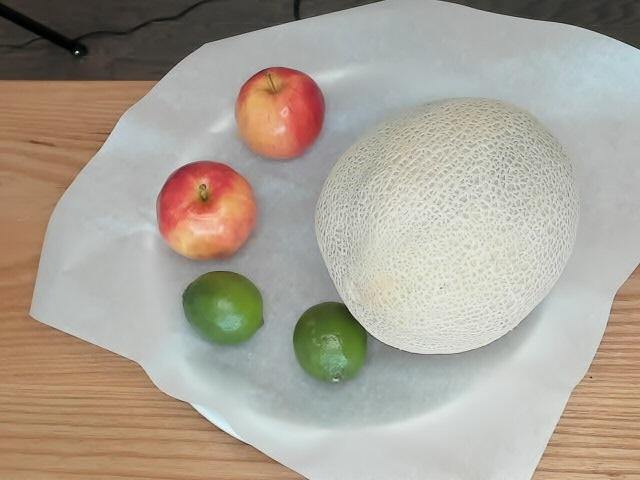

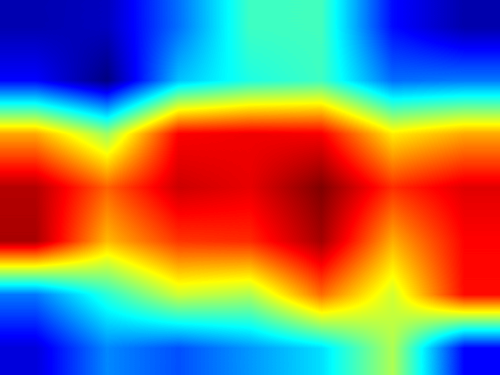

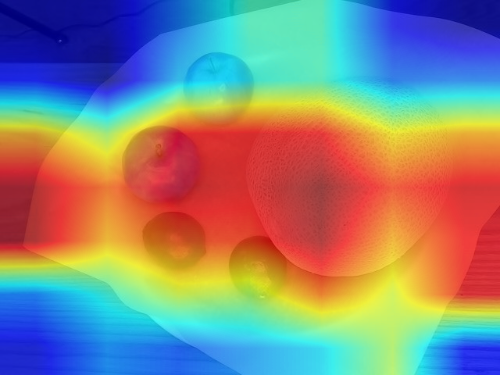

In [12]:
from PIL import Image
from IPython.display import display

original_image = Image.open(f'{data_root}/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_saliency_map.png')
overlayed_image = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_overlay.png')

display(original_image)
display(saliency_map)
display(overlayed_image)

## Export to IR Model
After we ensure the model is making the right predictions and are happy with the model to deploy, the next step is to export the model to IR format. This is particularly useful to improve the inference speed on edge devices. 

In [13]:
exported_ir_model_path = engine.export()
exported_ir_model_path

init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip
init weight - https://github.com/osmr/imgclsmob/releases/download/v0.0.364/efficientnet_b0-0752-0e386130.pth.zip


/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss_callable' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_callable'])`.
Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


PosixPath('/home/sakcay/projects/training_extensions/otx-workspace-cls/exported_model.xml')

## Evaluate IR Model
After exporting the model, we would like to ensure that accuracy has not dropped. Let's check it.

In [14]:
engine.test(checkpoint=exported_ir_model_path)

/home/sakcay/projects/training_extensions/src/otx/core/utils/build.py:52: UserWarning: Set the default number of OpenVINO inference requests to 18.
            You can specify the value in config.
  warnings.warn(msg, stacklevel=1)
/home/sakcay/projects/training_extensions/src/otx/engine/engine.py:346: UserWarning: IR model supports inference only on CPU device. The device is changed automatic.
  warn(msg, stacklevel=1)
/home/sakcay/projects/training_extensions/src/otx/engine/utils/auto_configurator.py:397: UserWarning: For OpenVINO IR models, Update the following test 
	 transforms: [{'class_path': 'torchvision.transforms.v2.ToImage'}] 
	 transform_lib_type: TransformLibType.TORCHVISION 
	 batch_size: 128 
	 image_color_channel: ImageColorChannel.RGB 
And the tiler is disabled.
  warn(msg, stacklevel=1)
/home/sakcay/projects/training_extensions/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filt

Output()

/home/sakcay/projects/training_extensions/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)


/home/sakcay/projects/training_extensions/src/otx/core/model/base.py:348: UserWarning: Log metric 
name=test/conf_matrix is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/accuracy       │    0.9830508232116699     │
└───────────────────────────┴───────────────────────────┘

{'test/accuracy': tensor(0.9831)}

As we can see above, the accuracy remains the same despite the model is optimized to run significantly faster.

## Explain IR model
Similar to the previous section, we could visualize the model predictions by calling the `explain` method.

In [11]:
from otx.core.config.explain import ExplainConfig

engine.explain(
    checkpoint=exported_ir_model_path,
    explain_config=ExplainConfig(postprocess=True),
    dump=True,
)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/utils/build.py:52: UserWarning: Set the default number of OpenVINO inference requests to 8.
            You can specify the value in config.
  warnings.warn(msg, stacklevel=1)
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/harimkan/workspace/repo/otx-regression/src/otx/core/data/entity/base.py:591: UserWarning: You set stack_images as True, but not all images in the batch has same shape. In this case, we cannot stack images. Some tasks, e.g., detection, can have different image shapes among samples in the batch. However, if it is not your intention, consider setting stack_images as False in the config.
  warnings.warn(msg, stacklevel=1)

[MultilabelClsBatchPredEntity(batch_size=59, images=[Image([[[ 53,  59,  61,  ...,  63,  65,  67],
         [ 47,  50,  53,  ...,  66,  68,  70],
         [ 22,  29,  41,  ...,  70,  72,  74],
         ...,
         [194, 194, 194,  ..., 221, 220, 221],
         [197, 196, 195,  ..., 218, 219, 223],
         [199, 198, 197,  ..., 213, 214, 217]],
 
        [[ 54,  59,  60,  ...,  60,  62,  64],
         [ 49,  51,  53,  ...,  63,  65,  67],
         [ 24,  31,  43,  ...,  67,  69,  71],
         ...,
         [152, 152, 152,  ..., 191, 190, 191],
         [154, 154, 153,  ..., 188, 189, 192],
         [157, 156, 155,  ..., 183, 184, 188]],
 
        [[ 38,  43,  45,  ...,  53,  55,  57],
         [ 35,  37,  40,  ...,  56,  58,  60],
         [ 12,  19,  32,  ...,  60,  62,  64],
         ...,
         [112, 112, 112,  ..., 153, 152, 153],
         [114, 114, 113,  ..., 150, 151, 154],
         [117, 116, 115,  ..., 145, 146, 150]]], dtype=torch.uint8, ), Image([[[ 17,  21,  25,  ..., 

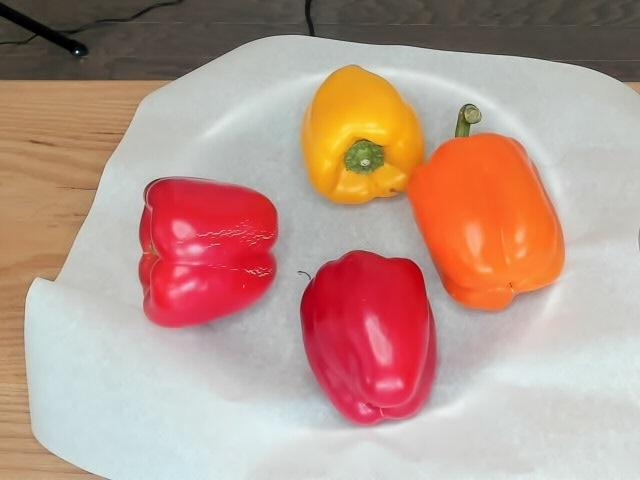

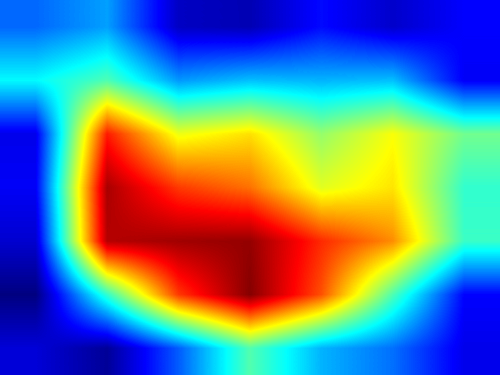

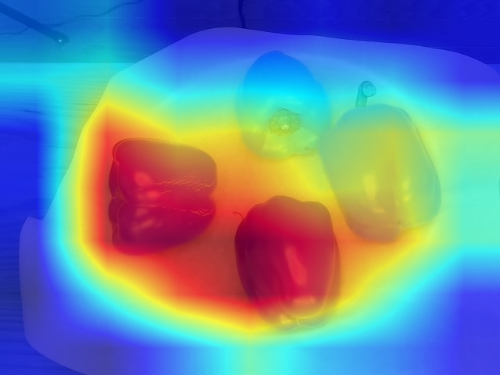

In [23]:
from PIL import Image
from IPython.display import display

original_image = Image.open(f'{data_root}/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_saliency_map.png')
overlayed_image = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_overlay.png')

display(original_image)
display(saliency_map)
display(overlayed_image)